# Pra Automasi

# Introduce
```
=================================================
Milestone 3 – Automasi Data Pipeline

Nama  : Dhias Renaldy Hendrawan
Batch : CODA-013-RMT

Program ini dibuat untuk melakukan automasi data pipeline
pada dataset patient healthcare menggunakan Apache Airflow.

Pipeline terdiri dari beberapa tahapan utama, yaitu:
1. Extract data dari file CSV menggunakan Pandas/PySpark
2. Transform data dengan melakukan data cleaning dan
   penggabungan kolom tanggal dan waktu menjadi datetime
3. Load data hasil transform ke storage/output untuk
   digunakan pada proses selanjutnya

Fitur-fitur utama dalam program ini meliputi:
- Pembacaan data secara otomatis dari folder data
- Transformasi kolom Patient Admission Date dan
  Patient Admission Time menjadi satu kolom datetime
- Penyimpanan data hasil transformasi
- Struktur kode modular menggunakan function
  agar mudah dipelihara dan diintegrasikan dengan Airflow
=================================================
```


# Getting Started

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Explore Data Analysis

In [2]:
# Import dataset
df= pd.read_csv("P2M3_dhias_renaldy_data_raw.csv")
df.head()

,Patient Id,Patient Admission Date,Patient Admission Time,Merged,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime
0,780-96-6113,9/9/2024,9:25:00 AM,W. Breede,Female,63,African American,NaN,Not Admission,5.0,32
1,714-35-6722,9/9/2024,4:42:00 PM,Y. Baldetti,Male,31,Asian,Orthopedics,Not Admission,NaN,22
2,571-85-3714,9/9/2024,12:14:00 AM,M. Semerad,Male,75,White,General Practice,Not Admission,NaN,16
3,404-43-9499,9/9/2024,8:33:00 PM,K. Blaydes,Male,79,African American,General Practice,Admission,NaN,38
4,552-51-5855,9/9/2024,7:25:00 PM,F. Dickerson,Female,24,African American,NaN,Admission,NaN,36


In [3]:
# Show Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient Id                  9216 non-null   object 
 1   Patient Admission Date      9216 non-null   object 
 2   Patient Admission Time      9216 non-null   object 
 3   Merged                      9216 non-null   object 
 4   Patient Gender              9216 non-null   object 
 5   Patient Age                 9216 non-null   int64  
 6   Patient Race                9216 non-null   object 
 7   Department Referral         3816 non-null   object 
 8   Patient Admission Flag      9216 non-null   object 
 9   Patient Satisfaction Score  2517 non-null   float64
 10  Patient Waittime            9216 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 792.1+ KB


In [4]:
# Cek Describe
df.describe()

,Patient Age,Patient Satisfaction Score,Patient Waittime
count,9216.000000,2517.000000,9216.000000
mean,39.855143,4.992054,35.259874
std,22.755125,3.138043,14.735323
min,1.000000,0.000000,10.000000
25%,20.000000,2.000000,23.000000
50%,39.000000,5.000000,35.000000
75%,60.000000,8.000000,48.000000
max,79.000000,10.000000,60.000000


In [5]:
# Show Missing Value
df.isna().sum()



Patient Id                       0
Patient Admission Date           0
Patient Admission Time           0
Merged                           0
Patient Gender                   0
Patient Age                      0
Patient Race                     0
Department Referral           5400
Patient Admission Flag           0
Patient Satisfaction Score    6699
Patient Waittime                 0
dtype: int64

In [6]:
# Show Duplicated Value
df.duplicated().sum()


0

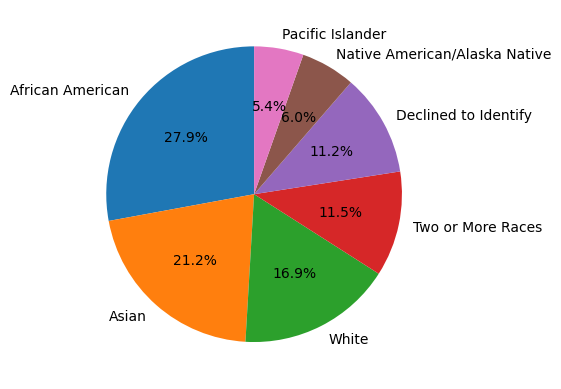

In [7]:
# Show Distribusi Patient Rate
categories = list(df["Patient Race"].unique())
sizes = list(df["Patient Race"].value_counts())
plt.pie(sizes, labels=categories, autopct='%.1f%%', startangle=90)
plt.show()


<Axes: >

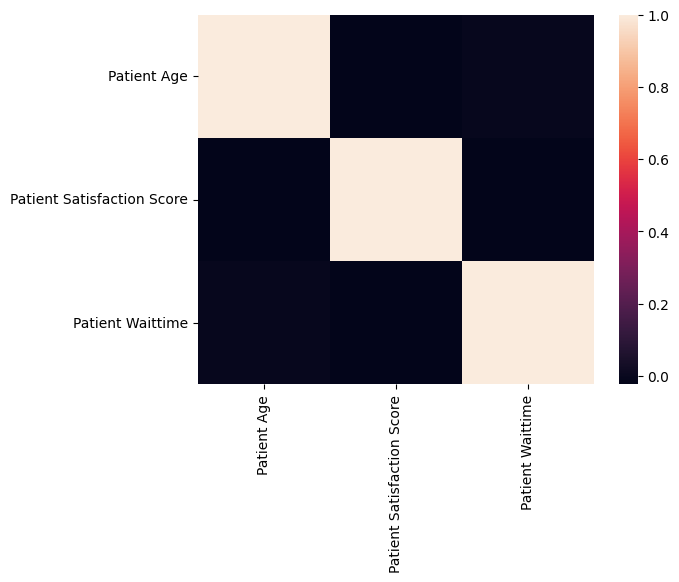

In [8]:
# Show Heat Map
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True))

# Measurement of Dispersion (Statistic Descriptive)

## Range

In [9]:
range = df['Patient Waittime'].max() - df['Patient Waittime'].min()
print('Range of Patient Waittime:',range)

Range of Patient Waittime: 50


## Quartile

In [10]:
q1 = df['Patient Waittime'].quantile(0.25)
q2 = df['Patient Waittime'].quantile(0.5)
q3 = df['Patient Waittime'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 23.0
Q2: 35.0
Q3: 48.0
Interquartile Range (IQR): 25.0


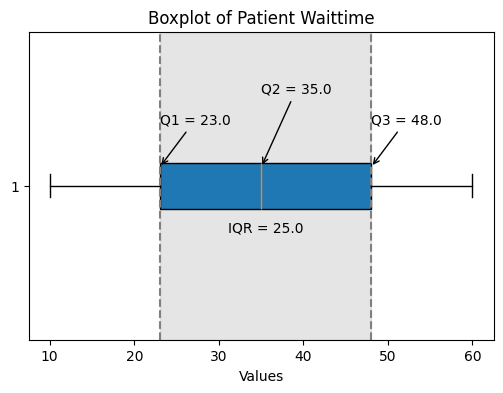

In [11]:
#@title Illustration of Quartile on Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['Patient Waittime'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Patient Waittime')

plt.show()

In [12]:
# Data Saving Clean to csv (untuk data visualization Tableu)
df.to_csv('P2M3_dhias_renaldy_data_cleaned.csv', index=False)

# Transform

In [13]:
import pandas as pd

# =========================
# 1. Rename column
# =========================
# Rename 'Merged' → 'Patient Name' (tetap object/string)
df = df.rename(columns={'Merged': 'Patient Name'})

# =========================
# 2. Combine Date & Time → Datetime
# =========================
df["Admission_DateTime"] = (
    df["Patient Admission Date"].astype(str).str.strip() + " " +
    df["Patient Admission Time"].astype(str).str.strip().str.upper()
)

df["Admission_DateTime"] = pd.to_datetime(
    df["Admission_DateTime"],
    dayfirst=True,
    errors="coerce"
)

# =========================
# 3. Save transformed data
# =========================
output_path = "P2M3_dhias_renaldy_data_transform.csv"
df.to_csv(output_path, index=False)

# =========================
# 4. Check data types
# =========================
df.dtypes


Patient Id                            object
Patient Admission Date                object
Patient Admission Time                object
Patient Name                          object
Patient Gender                        object
Patient Age                            int64
Patient Race                          object
Department Referral                   object
Patient Admission Flag                object
Patient Satisfaction Score           float64
Patient Waittime                       int64
Admission_DateTime            datetime64[ns]
dtype: object

In [15]:
# Recheck Data
df

,Patient Id,Patient Admission Date,Patient Admission Time,Patient Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Admission_DateTime
0,780-96-6113,9/9/2024,9:25:00 AM,W. Breede,Female,63,African American,NaN,Not Admission,5.0,32,2024-09-09 09:25:00
1,714-35-6722,9/9/2024,4:42:00 PM,Y. Baldetti,Male,31,Asian,Orthopedics,Not Admission,NaN,22,2024-09-09 16:42:00
2,571-85-3714,9/9/2024,12:14:00 AM,M. Semerad,Male,75,White,General Practice,Not Admission,NaN,16,2024-09-09 00:14:00
3,404-43-9499,9/9/2024,8:33:00 PM,K. Blaydes,Male,79,African American,General Practice,Admission,NaN,38,2024-09-09 20:33:00
4,552-51-5855,9/9/2024,7:25:00 PM,F. Dickerson,Female,24,African American,NaN,Admission,NaN,36,2024-09-09 19:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...
9211,353-25-3957,1/1/2024,11:01:00 PM,S. Levermore,Male,19,White,Cardiology,Not Admission,NaN,34,2024-01-01 23:01:00
9212,608-47-0337,1/1/2024,5:25:00 PM,R. Boyle,Female,22,White,Orthopedics,Admission,NaN,45,2024-01-01 17:25:00
9213,716-90-5923,1/1/2024,11:42:00 AM,V. Seadon,Female,8,African American,NaN,Admission,NaN,21,2024-01-01 11:42:00
9214,641-52-3173,1/1/2024,4:59:00 AM,L. Harford,Female,37,White,NaN,Not Admission,5.0,10,2024-01-01 04:59:00


# Great Expectation

## Getting Started

In [16]:
# Install the library

!pip install -q "great-expectations==0.18.19"

## Created Data Context

In [17]:
# Create a data context

from great_expectations.data_context import FileDataContext

context = FileDataContext.create(project_root_dir='./')

## Connect to DataSource

In [19]:
# Give a name to a Datasource. This name must be unique between Datasources.
datasource_name = 'csv-new-data-patient'
datasource = context.sources.add_pandas(datasource_name)

# Give a name to a data asset
asset_name = 'patient-admission'
path_to_data = 'P2M3_dhias_renaldy_data_transform.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

# Build batch request
batch_request = asset.build_batch_request()

In [20]:
import pandas as pd
df = pd.read_csv(path_to_data)
df.head()

,Patient Id,Patient Admission Date,Patient Admission Time,Patient Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Admission_DateTime
0,780-96-6113,9/9/2024,9:25:00 AM,W. Breede,Female,63,African American,NaN,Not Admission,5.0,32,2024-09-09 09:25:00
1,714-35-6722,9/9/2024,4:42:00 PM,Y. Baldetti,Male,31,Asian,Orthopedics,Not Admission,NaN,22,2024-09-09 16:42:00
2,571-85-3714,9/9/2024,12:14:00 AM,M. Semerad,Male,75,White,General Practice,Not Admission,NaN,16,2024-09-09 00:14:00
3,404-43-9499,9/9/2024,8:33:00 PM,K. Blaydes,Male,79,African American,General Practice,Admission,NaN,38,2024-09-09 20:33:00
4,552-51-5855,9/9/2024,7:25:00 PM,F. Dickerson,Female,24,African American,NaN,Admission,NaN,36,2024-09-09 19:25:00


## Create an Expectation Suite

In [21]:
# Creat an expectation suite
expectation_suite_name = 'expectation-patient-dataset'
context.add_or_update_expectation_suite(expectation_suite_name)

# Create a validator using above expectation suite
validator = context.get_validator(
    batch_request = batch_request,
    expectation_suite_name = expectation_suite_name
)

# Check the validator
validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,Patient Id,Patient Admission Date,Patient Admission Time,Patient Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Admission_DateTime
0,780-96-6113,9/9/2024,9:25:00 AM,W. Breede,Female,63,African American,NaN,Not Admission,5.0,32,2024-09-09 09:25:00
1,714-35-6722,9/9/2024,4:42:00 PM,Y. Baldetti,Male,31,Asian,Orthopedics,Not Admission,NaN,22,2024-09-09 16:42:00
2,571-85-3714,9/9/2024,12:14:00 AM,M. Semerad,Male,75,White,General Practice,Not Admission,NaN,16,2024-09-09 00:14:00
3,404-43-9499,9/9/2024,8:33:00 PM,K. Blaydes,Male,79,African American,General Practice,Admission,NaN,38,2024-09-09 20:33:00
4,552-51-5855,9/9/2024,7:25:00 PM,F. Dickerson,Female,24,African American,NaN,Admission,NaN,36,2024-09-09 19:25:00


## Expectations

In [22]:
# Expectation 1 : Column `Patient Admission Date` can not contain missing values

validator.expect_column_values_to_not_be_null('Patient Admission Date')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 9216,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [23]:
# Expectation 2 : Column `PatientID` can not contain missing values


validator.expect_column_values_to_not_be_null('Patient Id')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 9216,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [24]:
# Expectation 3 : Column `Patient Admission Time` can not contain missing values

validator.expect_column_values_to_not_be_null('Patient Admission Time')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 9216,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [25]:
# Expectation 4 : Column `Patient Admission Time` must be unique

validator.expect_column_values_to_be_unique('Admission_DateTime')

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": false,
  "result": {
    "element_count": 9216,
    "unexpected_count": 80,
    "unexpected_percent": 0.8680555555555556,
    "partial_unexpected_list": [
      "2024-09-09 12:34:00",
      "2024-09-09 12:34:00",
      "2023-11-07 04:52:00",
      "2023-11-07 04:52:00",
      "2024-04-06 09:56:00",
      "2024-04-06 09:56:00",
      "2023-11-05 18:08:00",
      "2023-11-05 18:08:00",
      "2023-08-04 22:18:00",
      "2023-08-04 22:18:00",
      "2024-06-03 18:24:00",
      "2024-06-03 18:24:00",
      "2023-06-29 19:19:00",
      "2023-06-29 19:19:00",
      "2024-01-29 08:11:00",
      "2024-01-29 08:11:00",
      "2024-04-28 17:08:00",
      "2024-04-28 17:08:00",
      "2024-04-27 02:32:00",
      "2024-04-27 02:32:00"
    ],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.8680555555555556,
    "unexpected_percent_nonmissing": 0.8680555555555556
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "excepti

In [26]:
# Expectation 5 : Column `Patient Age` must be within a reasonable human age range

validator.expect_column_values_to_be_between(
    column='Patient Age',
    min_value=0,
    max_value=100
)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 9216,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [27]:
# Expectation 6 : Column `Patient Waittime` must be within a reasonable Patient wait time range

validator.expect_column_values_to_be_between(
    column='Patient Waittime',
    min_value=0,
    max_value=200
)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 9216,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [28]:
# Expectation 7 : Column `Patient Gender` must contain only allowed values

validator.expect_column_values_to_be_in_set(
    column='Patient Gender',
    value_set=['Male', 'Female']
)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": false,
  "result": {
    "element_count": 9216,
    "unexpected_count": 17,
    "unexpected_percent": 0.18446180555555555,
    "partial_unexpected_list": [
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale",
      "Femaleemale"
    ],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.18446180555555555,
    "unexpected_percent_nonmissing": 0.18446180555555555
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [29]:
# Expectation 8 : Column `Patient Satisfaction Score` must in form of integer or float

validator.expect_column_values_to_be_in_type_list('Patient Satisfaction Score', ['integer', 'float'])

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [30]:
# Expectation 9 : The average of `Patient Satisfaction Score` must in range 0 - 5 miles per trip

validator.expect_column_mean_to_be_between('Patient Satisfaction Score', 0, 10)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 4.992054032578467
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [31]:
# Save into Expectation Suite

validator.save_expectation_suite(discard_failed_expectations=False)

## Checkpoint

In [32]:
# Create a checkpoint

checkpoint_1 = context.add_or_update_checkpoint(
    name = 'checkpoint_1',
    validator = validator,
)

In [33]:
# Run a checkpoint

checkpoint_result = checkpoint_1.run()

Calculating Metrics:   0%|          | 0/47 [00:00<?, ?it/s]

## Build Data Docs

In [34]:
# Build data docs

context.build_data_docs()

{'local_site': 'file://d:\\CODA\\gx\\uncommitted/data_docs/local_site/index.html'}